In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/knn-data1/Classified_Data.csv


# Training  KNN , Random Forest , Decision Tree of classification models  machin learning

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Our data is a training data without headers for columns.**

In [6]:
mydata = pd.read_csv("/kaggle/input/knn-data1/Classified_Data.csv",sep=";")

First we do the following 3 things to get acquainted with the nature of data and its management
# 1. EDA 
# 2. Data Wrangling
# 3. Data Preprocessing




In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [8]:
mydata.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


We found out that the names of the columns are fake

**Let's see if our data has null values.**

In [10]:
mydata.isnull().sum()

WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64

So there is no need for data wrangling and only **data preprocessing** will be done

# data preprocessing

In [23]:
X = mydata.iloc[:,0:10]
y = mydata.loc[:,'TARGET CLASS']

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)

After scaling,  dataset  divided in to two sets of test and train.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,test_size=0.30)

# Creat KNN Model

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [30]:
knn1_prediction = knn.predict(X_test)
print(confusion_matrix(y_test,knn1_prediction))
print(classification_report(y_test,knn1_prediction))

[[135  12]
 [ 10 143]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       147
           1       0.92      0.93      0.93       153

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



We get the best K using # **elbow method**

In [31]:
error_rate=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    peredict_i = knn.predict(X_test)
    error_rate.append(np.mean(peredict_i != y_test))

**The best value of K can be seen by drawing a graph**

 The best K is equal to 17     
 
 **k=17**

Text(0, 0.5, 'Error Rate')

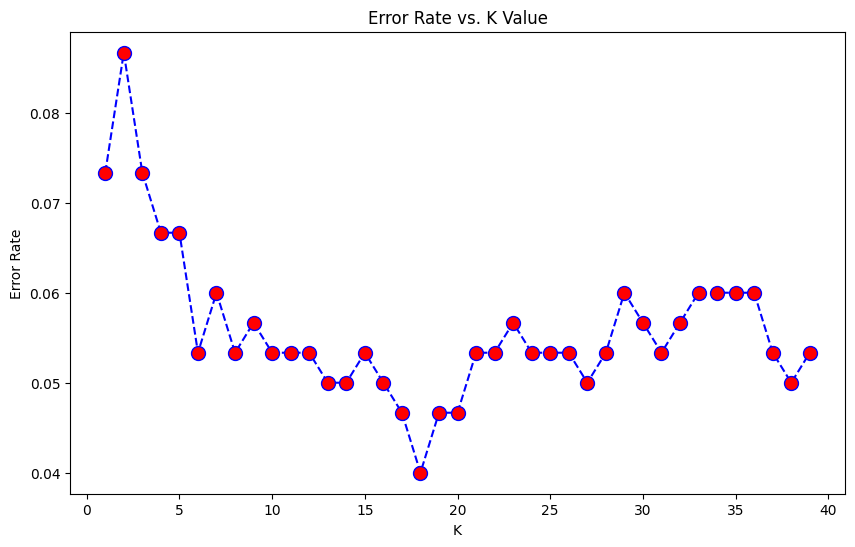

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [37]:
knn17_prediction = knn.predict(X_test)
print(confusion_matrix(y_test,knn17_prediction))
print(classification_report(y_test,knn17_prediction))

[[136  11]
 [  3 150]]
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       147
           1       0.93      0.98      0.96       153

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



**We were able to squeeze some more performance out of our model by tuning to a better K value!**

# Creat Decision Tree Model

In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

**Evaluation of decision tree model**

In [39]:
dtree_predictions = dtree.predict(X_test)
print(confusion_matrix(y_test,dtree_predictions))
print(classification_report(y_test,dtree_predictions))

[[133  14]
 [ 20 133]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       147
           1       0.90      0.87      0.89       153

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



# Creat Random Forest Model

In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)


RandomForestClassifier()

**Evaluation of Random Forest model**

In [44]:
rfc_predictions = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_predictions))
print(classification_report(y_test,rfc_predictions))

[[136  11]
 [  7 146]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       147
           1       0.93      0.95      0.94       153

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Now we have trained three models in one dataset.
We will look at the evaluation of models and choose the best model.